In [1]:
print("konichiwa!!!")

konichiwa!!!


In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
height=256
width=256
batch=32
channel=3
epoch=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"Segmented Medicinal Leaf Images",
    shuffle=True,
    image_size=(height,width),
    batch_size=batch
)

Found 1835 files belonging to 30 classes.


In [6]:
class_names=dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [7]:
len(dataset)

58

In [8]:
58*32

1856

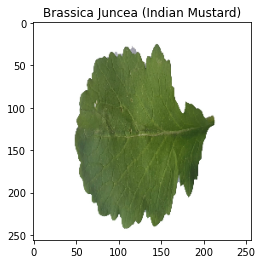

In [9]:
for image_batch,label_batch in dataset.take(1):
   # print(image_batch.shape)
    #print(label_batch.numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [10]:
train_size=0.8
len(dataset)*train_size

46.400000000000006

In [11]:
train_ds=dataset.take(46)
len(train_ds)

46

In [12]:
test_ds=dataset.skip(46)
len(test_ds)

12

In [13]:
val_size=0.1
len(dataset)*val_size

5.800000000000001

In [14]:
val_ds=test_ds.take(5)
len(val_ds)

5

In [15]:
test_ds=test_ds.skip(5)
len(test_ds)

7

In [16]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)

46

In [19]:
len(test_ds)

7

In [20]:
len(val_ds)

5

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch( buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch( buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch( buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(height,width),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_aug=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
])

In [24]:
input_shape=(batch,height,width,channel)
n_classes=30

In [27]:
    model=models.Sequential([
        resize_and_rescale,
        data_aug,
        layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(n_classes,activation="softmax"),
    ])

    model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [29]:
model.compile(
optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [30]:
history=model.fit(
   train_ds,
    epochs=epoch,
    batch_size=batch,
    validation_data=val_ds
)

Epoch 1/50
46/46 [==============================] - 65s 1s/step - loss: 3.3438 - accuracy: 0.0707 - val_loss: 3.1725 - val_accuracy: 0.1250
Epoch 2/50
46/46 [==============================] - 57s 1s/step - loss: 2.9185 - accuracy: 0.1780 - val_loss: 2.5789 - val_accuracy: 0.2688
Epoch 3/50
46/46 [==============================] - 56s 1s/step - loss: 2.5043 - accuracy: 0.2704 - val_loss: 2.8308 - val_accuracy: 0.2812
Epoch 4/50
46/46 [==============================] - 59s 1s/step - loss: 2.1741 - accuracy: 0.3757 - val_loss: 1.9641 - val_accuracy: 0.4375
Epoch 5/50
46/46 [==============================] - 60s 1s/step - loss: 1.8542 - accuracy: 0.4484 - val_loss: 1.6933 - val_accuracy: 0.4563
Epoch 6/50
46/46 [==============================] - 59s 1s/step - loss: 1.7065 - accuracy: 0.4830 - val_loss: 1.5515 - val_accuracy: 0.5625
Epoch 7/50
46/46 [==============================] - 63s 1s/step - loss: 1.4874 - accuracy: 0.5462 - val_loss: 1.3962 - val_accuracy: 0.6000
Epoch 8/50
46/46 [==

Epoch 42/50
46/46 [==============================] - 118s 3s/step - loss: 0.2451 - accuracy: 0.9110 - val_loss: 0.7263 - val_accuracy: 0.8125
Epoch 43/50
46/46 [==============================] - 115s 3s/step - loss: 0.2893 - accuracy: 0.9069 - val_loss: 0.5062 - val_accuracy: 0.8625
Epoch 44/50
46/46 [==============================] - 118s 3s/step - loss: 0.2100 - accuracy: 0.9260 - val_loss: 0.4990 - val_accuracy: 0.8750
Epoch 45/50
46/46 [==============================] - 115s 3s/step - loss: 0.2086 - accuracy: 0.9334 - val_loss: 0.5015 - val_accuracy: 0.8562
Epoch 46/50
46/46 [==============================] - 113s 2s/step - loss: 0.1675 - accuracy: 0.9429 - val_loss: 0.4309 - val_accuracy: 0.8938
Epoch 47/50
46/46 [==============================] - 113s 2s/step - loss: 0.1870 - accuracy: 0.9355 - val_loss: 0.5333 - val_accuracy: 0.8938
Epoch 48/50
46/46 [==============================] - 111s 2s/step - loss: 0.1862 - accuracy: 0.9416 - val_loss: 0.3471 - val_accuracy: 0.9062
Epoch 

In [34]:
scores=model.evaluate(test_ds)

7/7 [==============================] - 3s 396ms/step - loss: 0.4271 - accuracy: 0.8818


In [35]:
scores

[0.4270809590816498, 0.8817734122276306]

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Actual Output :  Santalum Album (Sandalwood)
1/1 [==============================] - 0s 400ms/step
Predicted Output : Santalum Album (Sandalwood)


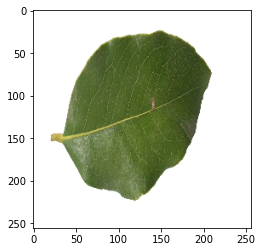

In [42]:
import numpy as np
for images,labels in test_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    print("Actual Output : ",class_names[labels[0].numpy()])
    batch_predict=model.predict(images)
    print("Predicted Output :",class_names[np.argmax(batch_predict[0])])

In [43]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'train vs val loss')

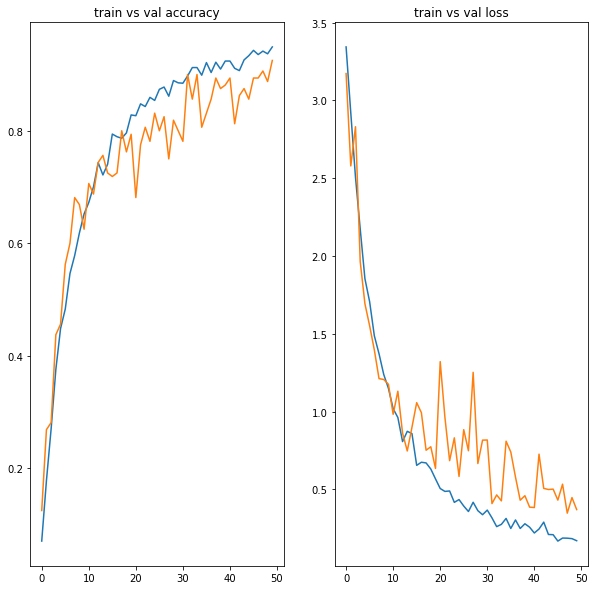

In [74]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epoch),acc,label="training accuracy")
plt.plot(range(epoch),val_acc,label="validation accuracy")
plt.title("train vs val accuracy")
plt.subplot(1,2,2)
plt.plot(range(epoch),loss,label="training loss")
plt.plot(range(epoch),val_loss,label="validation loss")
plt.title("train vs val loss")

In [68]:
def predict(model,img):
    img_arr=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arr=tf.expand_dims(img_arr,0)
    prediction=model.predict(img_arr)
    prediction_class=class_names[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])),2)
    return prediction_class,confidence

1/1 [==============================] - 0s 33ms/step


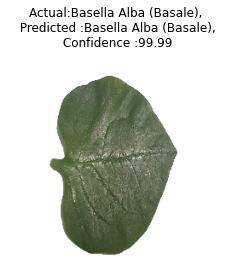

In [78]:
for images,labels in test_ds.take(1):
        plt.imshow(images[i].numpy().astype("uint8"))
        prediction,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted :{prediction},\n Confidence :{confidence}" )
        plt.axis("off")

In [77]:
model_version=1
model.save(f"./Model 1/{model_version}")

INFO:tensorflow:Assets written to: ./Model 1/1\assets


INFO:tensorflow:Assets written to: ./Model 1/1\assets
